## Assignment 1 - Gradient Descent Algorithms with PyTorch
The following code cell is used to generate some noisy data (don't change this code).  You will need to use the data generated here to train a linear model $y=ax+b$ (i.e., Perform gradient descent on the two parameters $a$ and $b$). 


1.   You will need to code two algorithms (1) Gradient Descent + regular momentum, and (2) Adam, using PyTorch "autograd".
2.   Check your results against the linear regression model. You can do linear regression using "sklearn.linear_model" (Hint: you need to convert tensor to numpy array.)






In [254]:
import torch
torch.manual_seed(42)
x = torch.rand(100,1)
y = 1 + 2 * x + .1 * torch.rand(100, 1)

In [255]:
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
a, b

(tensor([-0.6430], requires_grad=True), tensor([0.7113], requires_grad=True))

## Your code goes here:

# Model and loading pytorch package

In [256]:
import time
start_time = time.time()
# print('start_time: ', start_time)
!pip install PySimpleGUI
import torch
import PySimpleGUI as sg

!pip install matplotlib
import matplotlib
matplotlib.use('tkagg')
from matplotlib.backends.backend_tkagg import FigureCanvasAgg
import matplotlib.backends.backend_tkagg as tkagg
import tkinter as Tk


import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle

from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict

In [257]:
############     Linear regression model - 3 hidden layers    #####################
epochs = 500
input_dim = 1
output_dim = 1
dropout_prob = 0.1
nodes_hidden_1 = 50
nodes_hidden_2 = 50
nodes_hidden_3 = 50
## nn.Linear() is fully connected layer  
model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_dim, nodes_hidden_1)),   
                        ('relu', nn.ReLU()),     #ReLu nonlinear activation
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
                        ('relu', nn.ReLU()),      #ReLu nonlinear activation
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc3', nn.Linear(nodes_hidden_2, nodes_hidden_3)),
                        ('relu', nn.ReLU()),       #ReLu nonlinear activation
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc4', nn.Linear(nodes_hidden_3, output_dim)),
                        ]))

# [1] (a)Gradient Descent + regular momentum

In [258]:
y_predict = a*x+b

inputs = x;
labels =y;

# learning rate and momentum for SDG
learning_rate = 0.0001
momentum = 0.9

# MSE loss algorithm
criterion = nn.MSELoss()  

# Gradient Descent + regular momentum optimizer
optimizer = optim.SGD(model.parameters(), learning_rate, momentum)  

running_loss = []
running_loss_validation = []

#number of iteration for learning
epochs = 500
for epoch in range(epochs):
  epoch+=1

  #################   train the model   ######################
  model.train()    # prep model for training

  # Clear gradients w.r.t. parameters, else gradients will be added up with every previous pass
  optimizer.zero_grad() 

  # Forward to get output
  outputs = model(inputs)

  # Calculate Loss
  loss = criterion(outputs, labels)       ## mean squared error
  
  # Getting gradients w.r.t. parameters
  loss.backward()
    
  # Updating parameters (weight and bias)
  optimizer.step()         ## take a step with optimizer to update the weights
  running_loss.append(loss.item())

  print('epoch: {}, mse_loss: {:.6f}'.format(epoch, loss.item()))

epoch: 1, mse_loss: 4.410380
epoch: 2, mse_loss: 4.403288
epoch: 3, mse_loss: 4.380373
epoch: 4, mse_loss: 4.368708
epoch: 5, mse_loss: 4.349445
epoch: 6, mse_loss: 4.319272
epoch: 7, mse_loss: 4.285129
epoch: 8, mse_loss: 4.251836
epoch: 9, mse_loss: 4.208298
epoch: 10, mse_loss: 4.160007
epoch: 11, mse_loss: 4.121099
epoch: 12, mse_loss: 4.077588
epoch: 13, mse_loss: 4.029934
epoch: 14, mse_loss: 3.976165
epoch: 15, mse_loss: 3.915988
epoch: 16, mse_loss: 3.871202
epoch: 17, mse_loss: 3.826436
epoch: 18, mse_loss: 3.769904
epoch: 19, mse_loss: 3.707762
epoch: 20, mse_loss: 3.653659
epoch: 21, mse_loss: 3.596704
epoch: 22, mse_loss: 3.534657
epoch: 23, mse_loss: 3.480815
epoch: 24, mse_loss: 3.422910
epoch: 25, mse_loss: 3.389732
epoch: 26, mse_loss: 3.318213
epoch: 27, mse_loss: 3.276924
epoch: 28, mse_loss: 3.188318
epoch: 29, mse_loss: 3.149011
epoch: 30, mse_loss: 3.110818
epoch: 31, mse_loss: 3.056498
epoch: 32, mse_loss: 2.984353
epoch: 33, mse_loss: 2.967710
epoch: 34, mse_loss

# [1] (b)Adam, using PyTorch "autograd"



In [259]:
y_predict = a*x+b

inputs = x;
labels =y;

# learning rate for Adam
learning_rate = 0.0001

# MSE loss algorithm
criterion = nn.MSELoss()  

# Adam, using PyTorch "autograd" optimizer
optimizer = optimizer = optim.Adam(model.parameters(), learning_rate)

running_loss = []
running_loss_validation = []

#number of iteration for learning
epochs = 500
for epoch in range(epochs):
  epoch+=1

  #################   train the model   ######################
  model.train()    # prep model for training

  # Clear gradients w.r.t. parameters, else gradients will be added up with every previous pass
  optimizer.zero_grad() 

  # Forward to get output
  outputs = model(inputs)

  # Calculate Loss
  loss = criterion(outputs, labels)       ## mean squared error
  
  # Getting gradients w.r.t. parameters
  loss.backward()
    
  # Updating parameters (weight and bias)
  optimizer.step()         ## take a step with optimizer to update the weights
  running_loss.append(loss.item())

  print('epoch: {}, mse_loss: {:.6f}'.format(epoch, loss.item()))

epoch: 1, mse_loss: 0.122736
epoch: 2, mse_loss: 0.155936
epoch: 3, mse_loss: 0.165967
epoch: 4, mse_loss: 0.130460
epoch: 5, mse_loss: 0.142694
epoch: 6, mse_loss: 0.172759
epoch: 7, mse_loss: 0.133338
epoch: 8, mse_loss: 0.168943
epoch: 9, mse_loss: 0.132607
epoch: 10, mse_loss: 0.137230
epoch: 11, mse_loss: 0.134784
epoch: 12, mse_loss: 0.117207
epoch: 13, mse_loss: 0.164012
epoch: 14, mse_loss: 0.141073
epoch: 15, mse_loss: 0.144455
epoch: 16, mse_loss: 0.161019
epoch: 17, mse_loss: 0.122422
epoch: 18, mse_loss: 0.115773
epoch: 19, mse_loss: 0.118365
epoch: 20, mse_loss: 0.114913
epoch: 21, mse_loss: 0.139937
epoch: 22, mse_loss: 0.124463
epoch: 23, mse_loss: 0.110976
epoch: 24, mse_loss: 0.117164
epoch: 25, mse_loss: 0.149616
epoch: 26, mse_loss: 0.156985
epoch: 27, mse_loss: 0.127586
epoch: 28, mse_loss: 0.114116
epoch: 29, mse_loss: 0.131590
epoch: 30, mse_loss: 0.135470
epoch: 31, mse_loss: 0.143002
epoch: 32, mse_loss: 0.120538
epoch: 33, mse_loss: 0.098417
epoch: 34, mse_loss

# [2] Check your results against the linear regression model

In [260]:
# data for regression fitting
x= x.numpy()
y= y.numpy()
print ([x])
print([y])

[array([[0.88226926],
       [0.91500396],
       [0.38286376],
       [0.95930564],
       [0.3904482 ],
       [0.60089535],
       [0.25657248],
       [0.7936413 ],
       [0.94077146],
       [0.13318592],
       [0.9345981 ],
       [0.59357965],
       [0.86940444],
       [0.5677153 ],
       [0.74109405],
       [0.4294045 ],
       [0.8854429 ],
       [0.57390445],
       [0.26658005],
       [0.62744915],
       [0.26963168],
       [0.44136357],
       [0.29692084],
       [0.8316855 ],
       [0.10531491],
       [0.26949483],
       [0.35881263],
       [0.19936377],
       [0.54719156],
       [0.00616044],
       [0.95155454],
       [0.07526588],
       [0.8860137 ],
       [0.5832096 ],
       [0.33764774],
       [0.808975  ],
       [0.5779254 ],
       [0.9039817 ],
       [0.55465984],
       [0.3423134 ],
       [0.63434184],
       [0.36441028],
       [0.7104288 ],
       [0.9464111 ],
       [0.7890298 ],
       [0.28141373],
       [0.78863233],
       [0.58

In [261]:
# regressor fitting
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)
print(reg.intercept_)
print(f'Result: y = {reg.intercept_[0]} + {reg.coef_[0][0]} x ')
y_fit = reg.coef_ * x + reg.intercept_;

0.9978568840934641
[[2.0108862]]
[1.0401309]
Result: y = 1.040130853652954 + 2.0108861923217773 x 


[[0.12273608893156052, 0.13478368520736694, 0.13993696868419647, 0.14300177991390228, 0.09846742451190948, 0.06973745673894882, 0.09509672224521637, 0.05944674462080002, 0.12891532480716705, 0.05380716174840927, 0.06443881243467331, 0.0464160218834877, 0.05208507552742958, 0.07527348399162292, 0.0440397746860981, 0.05520620197057724, 0.05446513742208481, 0.0375436432659626, 0.02819133922457695, 0.04263319820165634, 0.040927544236183167, 0.05083344131708145, 0.03580638766288757, 0.034554775804281235, 0.02602803148329258, 0.03304867446422577, 0.024714309722185135, 0.023989595472812653, 0.021244382485747337, 0.021077537909150124, 0.01851886324584484, 0.025262344628572464, 0.02813754230737686, 0.02957075648009777, 0.031075086444616318, 0.014631813392043114, 0.02057264745235443, 0.01897526904940605, 0.025452466681599617, 0.019635634496808052, 0.013666915707290173, 0.021534496918320656, 0.017200753092765808, 0.015428240410983562, 0.014459359459578991, 0.019701870158314705, 0.0155923021957278

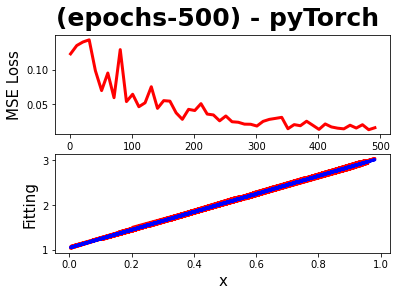

In [262]:
# plot the loss and regression fitting

mse_training_interval = 10
mse_validation_interval = 10
running_loss = running_loss[::mse_training_interval]
running_loss_index = [i for i in range(1, epochs, mse_training_interval)]
print ([running_loss])
print([running_loss_index])

## Plot the regression model
plt.figure()
plt.suptitle('(epochs-{}) - pyTorch'.format(epochs), fontsize=25, fontweight='bold')

plt.subplot(211)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('MSE Loss', fontsize=15)

plt.subplot(212)
plt.plot(x, y, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(x, y_fit, 'b-', linewidth=3, label='mse_loss_train')
plt.xlabel('x', fontsize=15)
plt.ylabel('Fitting', fontsize=15)

plt.show()